In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
'''groups = [['ADANIPORTS.NS', 'ASIANPAINT.NS', 'BPCL.NS', 'DIVISLAB.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'NTPC.NS', 'POWERGRID.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TITAN.NS'],
          ['BAJFINANCE.NS', 'BHARTIARTL.NS', 'CIPLA.NS', 'DRREDDY.NS', 'INDUSINDBK.NS', 'KOTAKBANK.NS', 'M&M.NS', 'RELIANCE.NS', 'SHRIRAMFIN.NS', 'WIPRO.NS'],
          ['APOLLOHOSP.NS', 'BAJAJ-AUTO.NS', 'BRITANNIA.NS', 'EICHERMOT.NS', 'HEROMOTOCO.NS', 'HINDUNILVR.NS', 'ITC.NS', 'NESTLEIND.NS', 'ULTRACEMCO.NS'],
          ['HINDALCO.NS', 'INFY.NS', 'JSWSTEEL.NS', 'LT.NS', 'MARUTI.NS', 'ONGC.NS', 'SBIN.NS', 'TATASTEEL.NS'],
          ['AXISBANK.NS', 'COALINDIA.NS', 'ICICIBANK.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TECHM.NS']]'''

"groups = [['ADANIPORTS.NS', 'ASIANPAINT.NS', 'BPCL.NS', 'DIVISLAB.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'NTPC.NS', 'POWERGRID.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TITAN.NS'],\n          ['BAJFINANCE.NS', 'BHARTIARTL.NS', 'CIPLA.NS', 'DRREDDY.NS', 'INDUSINDBK.NS', 'KOTAKBANK.NS', 'M&M.NS', 'RELIANCE.NS', 'SHRIRAMFIN.NS', 'WIPRO.NS'],\n          ['APOLLOHOSP.NS', 'BAJAJ-AUTO.NS', 'BRITANNIA.NS', 'EICHERMOT.NS', 'HEROMOTOCO.NS', 'HINDUNILVR.NS', 'ITC.NS', 'NESTLEIND.NS', 'ULTRACEMCO.NS'],\n          ['HINDALCO.NS', 'INFY.NS', 'JSWSTEEL.NS', 'LT.NS', 'MARUTI.NS', 'ONGC.NS', 'SBIN.NS', 'TATASTEEL.NS'],\n          ['AXISBANK.NS', 'COALINDIA.NS', 'ICICIBANK.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TECHM.NS']]"

In [83]:
groups = [['AXISBANK.NS', 'ICICIBANK.NS', 'LT.NS', 'SHRIRAMFIN.NS', 'SBIN.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS'],
          ['ADANIPORTS.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BPCL.NS', 'DRREDDY.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'INDUSINDBK.NS', 'POWERGRID.NS', 'SUNPHARMA.NS', 'TCS.NS', 'ULTRACEMCO.NS'],
          ['APOLLOHOSP.NS', 'EICHERMOT.NS', 'HINDUNILVR.NS'],
          ['HINDALCO.NS', 'JSWSTEEL.NS'],
          ['ASIANPAINT.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BRITANNIA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'ITC.NS', 'KOTAKBANK.NS', 'NESTLEIND.NS', 'TITAN.NS'],
          ['CIPLA.NS', 'INFY.NS', 'M&M.NS', 'MARUTI.NS', 'NTPC.NS', 'ONGC.NS', 'RELIANCE.NS', 'TATACONSUM.NS', 'TECHM.NS', 'WIPRO.NS']]

In [84]:
#Parameters
trading_window = 21

#RSI Parameters
period = 14

In [85]:
data=pd.read_csv('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/data/Nifty_50_close.csv')
stock_names = data.columns[1:]

In [86]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [87]:
master_rsi = master_rsi[232:725]
master_rsi

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
246,2012-01-02,30.068511,34.553659,47.290838,31.167518,27.658764,26.194605,30.488426,41.363843,33.730662,...,40.494133,43.482229,58.344337,58.559935,53.883682,35.652069,48.925565,46.615087,48.569058,52.429522
247,2012-01-03,29.687270,42.597232,48.230537,39.608116,38.184694,30.390458,37.678058,49.306934,31.736781,...,49.889103,47.040671,62.746977,65.770224,61.926180,46.399971,60.843696,50.997984,54.201973,62.773849
248,2012-01-04,27.071222,45.860226,50.536682,42.387600,40.496625,24.865887,34.591552,42.444064,31.211283,...,48.866492,48.519081,54.687654,67.220467,66.489122,47.358300,62.344970,49.265529,45.783860,63.625612
249,2012-01-05,24.301324,50.440721,51.214466,42.088331,45.183125,33.049337,35.885521,43.508435,28.530729,...,48.465271,47.410532,54.381939,59.833445,67.017545,46.779285,57.515388,47.913371,47.900989,60.800276
250,2012-01-06,25.380258,51.586483,51.096672,41.022812,42.439387,32.015646,29.717557,44.126675,37.426240,...,46.228673,47.502801,53.543578,60.643456,67.925366,47.318771,58.879952,44.457789,48.034248,53.648039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2013-12-24,59.999813,52.373830,60.798492,39.621227,61.302201,54.469126,66.041526,50.961066,51.491302,...,48.383307,42.475905,61.241632,65.632381,45.432177,63.432735,70.230392,47.716991,43.241846,67.659904
735,2013-12-26,60.653896,53.121996,63.656501,41.990848,63.264924,48.663960,62.458547,54.358013,55.641960,...,47.526307,44.080284,59.006542,70.179670,43.710284,67.016270,68.876958,50.053004,40.972549,70.570326
736,2013-12-27,62.042227,53.182901,74.484365,38.810551,62.646065,46.727456,63.481167,58.745434,53.501827,...,50.250517,47.733059,66.619619,63.083249,45.246702,66.712390,72.327760,49.374211,39.639213,72.600961
737,2013-12-30,57.026133,49.126199,76.021624,41.569776,60.581459,42.520961,68.062053,59.793499,51.011477,...,49.339295,44.402867,65.619454,65.288213,47.936447,66.981111,68.983309,48.663519,35.718712,69.769469


In [88]:
prices = pd.read_csv('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/data/Nifty_50_close.csv')
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices = prices[232:725]
prices

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
232,2012-01-02,37.360771,107.228615,525.169067,235.916962,148.065018,1065.440308,55.414848,40.812176,45.257996,...,140.477142,228.193024,460.627289,76.796593,176.190018,23.493450,112.312416,164.542923,1103.533936,133.781372
233,2012-01-03,37.192516,112.463844,529.493469,241.563690,156.029007,1079.160034,56.291901,42.381313,44.528011,...,147.209091,230.151428,468.053009,79.836380,185.768158,24.922617,117.820969,168.676498,1124.237549,139.649033
234,2012-01-04,36.001732,114.847740,539.994751,243.626602,158.003723,1029.372192,55.589333,40.642147,44.334942,...,146.380539,230.980881,458.438568,80.554115,192.712311,25.067259,118.694916,167.032440,1091.963379,140.235764
235,2012-01-05,34.571499,118.446945,543.035950,243.330658,162.195282,1060.457764,55.750061,40.860756,43.317680,...,146.069809,230.335770,458.047821,78.612030,193.574326,24.974277,116.917587,165.764221,1099.804688,139.129272
236,2012-01-06,34.759174,119.381821,542.560852,242.319687,159.000381,1051.901123,54.184223,40.982216,44.881237,...,144.369598,230.381851,457.031555,78.949776,195.011047,25.046595,117.624580,162.429199,1100.282837,136.044571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,2013-12-24,37.932167,151.242538,841.483582,453.056488,246.224808,1515.330933,148.277145,69.782555,69.133888,...,157.628525,528.518677,849.482483,137.221069,365.837646,30.586472,363.186096,217.880722,1733.982666,187.426743
721,2013-12-26,38.115818,151.859665,851.102295,455.333771,248.930923,1484.230103,146.994553,70.751144,70.415260,...,157.108841,530.941040,845.296814,140.537064,363.481506,31.094542,362.036407,219.551605,1718.008179,190.376434
722,2013-12-27,38.497261,151.907120,903.090881,450.918518,248.441498,1473.000366,147.609268,72.131989,69.859016,...,158.600677,536.577332,869.585327,137.919174,365.101349,31.072613,368.944519,219.074203,1708.500610,192.632095
723,2013-12-30,37.614292,149.106354,913.478943,453.474792,246.858170,1447.077026,150.614853,72.479691,69.203423,...,158.107880,530.568237,867.734314,139.446259,367.948334,31.109159,366.139618,218.596817,1678.723389,191.400146


# Strat-1 fixed exit the end of the window

In [89]:
def get_returns(groups,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_rsi.iloc[i,j]<30):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_rsi.iloc[i,j]>70):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n+=1
            intrade = []
            returns.append(temp)
            temp = 0
            num_trades.append(n)
            n = 0

        i += 1

    return returns,num_trades

In [90]:
returns,num_trades = get_returns(groups,master_rsi,prices,trading_window)


In [91]:
tradesheet1 = pd.DataFrame()
tradesheet1['Returns'] = returns
tradesheet1['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet1.insert(0,f'Window (period = {trading_window})',windows)
tradesheet1

,Window (period = 21),Returns,Number of Trades
0,1,0.000000,0
1,2,0.000000,0
2,3,0.000000,0
3,4,0.000000,0
4,5,48.131127,4
5,6,0.000000,0
6,7,-54.900179,4
7,8,219.095337,18
8,9,2.256842,1
9,10,0.000000,0


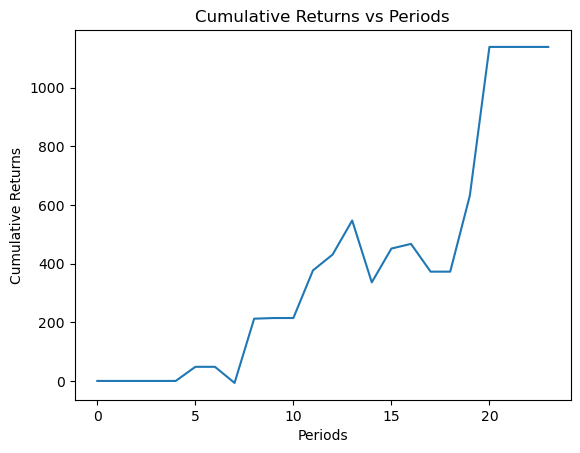

In [92]:
cumulative_returns_1 = []
cumulative_returns_1.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_1.append(s)


plt.plot(windows,cumulative_returns_1)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()

# Strat-2 with variable exit in window + fixed exit at the end

In [93]:
def get_returns_2(groups,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_rsi.iloc[i,j]<30):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_rsi.iloc[i,j]>70):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
            
            elif(buy!=0):
                for trade in intrade:
                    if(trade[3]==buy):
                        b1 = prices.iloc[trade[0],trade[1]]
                        s1 = prices.iloc[trade[0],trade[3]]
                        b2 = prices.iloc[i,trade[1]]
                        s2 = prices.iloc[i,trade[3]]
                        temp += (((b2-b1))*trade[2]) + ((s1-s2))
                        intrade.remove(trade)
                        n += 1


            elif(sell!=0):
                for trade in intrade:
                    if(trade[1]==sell):
                        b1 = prices.iloc[trade[0],trade[1]]
                        s1 = prices.iloc[trade[0],trade[3]]
                        b2 = prices.iloc[i,trade[1]]
                        s2 = prices.iloc[i,trade[3]]
                        temp += (((b2-b1))*trade[2]) + ((s1-s2))
                        intrade.remove(trade)
                        n += 1 
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n += 1
            intrade = []
            returns.append(temp)
            num_trades.append(n)
            temp = 0
            n = 0

        i += 1

    return returns,num_trades

In [94]:
returns,num_trades = get_returns_2(groups,master_rsi,prices,trading_window)

In [95]:
tradesheet2 = pd.DataFrame()
tradesheet2['Returns'] = returns
tradesheet2['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet2.insert(0,f'Window (period = {trading_window})',windows)
tradesheet2

,Window (period = 21),Returns,Number of Trades
0,1,0.000000,0
1,2,0.000000,0
2,3,0.000000,0
3,4,0.000000,0
4,5,48.131127,4
5,6,0.000000,0
6,7,-54.900179,4
7,8,219.095337,18
8,9,2.256842,1
9,10,0.000000,0


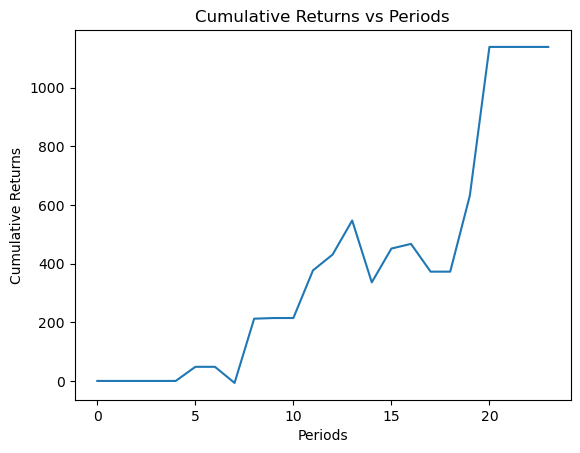

In [96]:
cumulative_returns_2 = []
cumulative_returns_2.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_2.append(s)


plt.plot(windows,cumulative_returns_2)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()

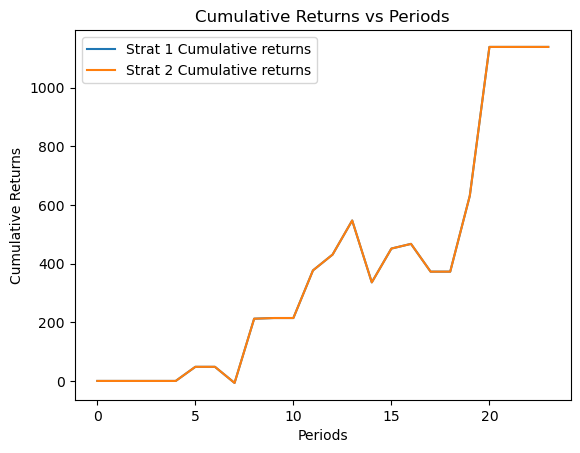

In [97]:
plt.plot(windows,cumulative_returns_1,label = "Strat 1 Cumulative returns")
plt.plot(windows,cumulative_returns_2,label = "Strat 2 Cumulative returns")
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.legend()
plt.show()
